In [1]:
import pandas as pd

In [4]:
X_train=pd.read_csv("X_train_smote.csv")
X_train.shape

(182, 12)

In [6]:
X_test=pd.read_csv("X_test_rfe.csv")
X_test.shape

(35, 12)

In [8]:
y_train=pd.read_csv("y_train_smote.csv")
y_train.shape

(182, 1)

In [9]:
y_test=pd.read_csv("y_test.csv")
y_test.shape

(35, 1)

In [10]:
import seaborn as sns

In [20]:
sum(y_train['Class']=='Toxic')

91

In [21]:
sum(y_train['Class']=='NonToxic')

91

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE(n_components=2, random_state=42)

In [24]:
X_tsne = tsne.fit_transform(X_train)

C:\Users\KORISNIK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\KORISNIK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


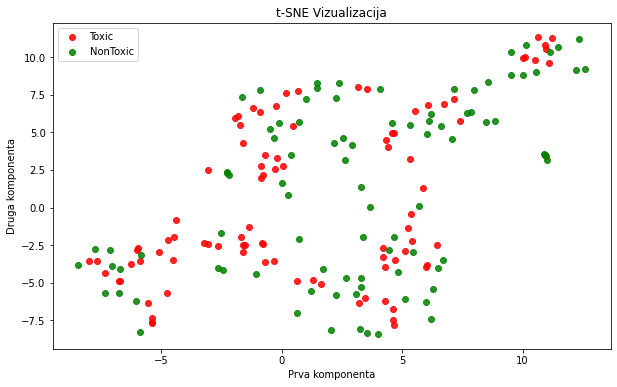

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_train['Class']=='Toxic', 0], X_tsne[y_train['Class']=='Toxic', 1], label='Toxic', alpha=0.85,color='red')
plt.scatter(X_tsne[y_train['Class']=='NonToxic', 0], X_tsne[y_train['Class']=='NonToxic', 1], label='NonToxic', alpha=0.85,color='green')
plt.legend()
plt.title('t-SNE Vizualizacija')
plt.xlabel('Prva komponenta')
plt.ylabel('Druga komponenta')
plt.savefig('Vizualizacija_posle_SMOTE.png')
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score

In [81]:
clf = DecisionTreeClassifier()

In [82]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred = clf.predict(X_test)


In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Tačnost modela: {accuracy:.2f}")

Tačnost modela: 0.69


In [85]:
f1_toxic = f1_score(y_test, y_pred, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred, pos_label="NonToxic")

print(f"F1 skor za toxic: {f1_toxic:.2f}")
print(f"F1 skor za nontoxic: {f1_nontoxic:.2f}")

F1 skor za toxic: 0.48
F1 skor za nontoxic: 0.78


In [67]:
from sklearn.model_selection import GridSearchCV

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>


In [88]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
num_folds = 5

# Kreirajte GridSearchCV objekat
grid_search = GridSearchCV(clf, param_grid, cv=num_folds, scoring='accuracy')

# Izvršite pretragu po rešetki
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [94]:
# Ispisivanje najboljih hiperparametara
print("Najbolji hiperparametri:")
print(grid_search.best_params_)

# Ispisivanje najbolje postignute tačnosti
print("Najbolja tačnost:")
print(grid_search.best_score_)

Najbolji hiperparametri:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Najbolja tačnost:
0.7531531531531531


In [95]:
y_pred=grid_search.best_estimator_.predict(X_test)

In [96]:
f1_toxic = f1_score(y_test, y_pred, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred, pos_label="NonToxic")

print(f"F1 skor za toxic: {f1_toxic:.2f}")
print(f"F1 skor za nontoxic: {f1_nontoxic:.2f}")

F1 skor za toxic: 0.38
F1 skor za nontoxic: 0.73


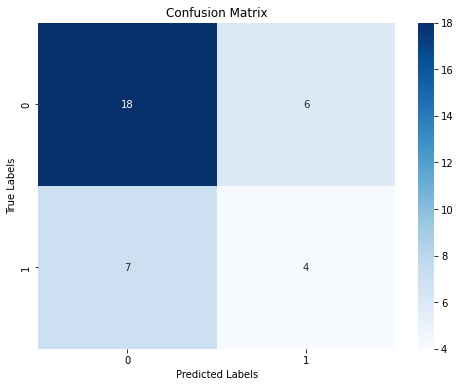

In [98]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)

# Vizualizacija matrice konfuzije koristeći seaborn biblioteku
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
confusion

array([[18,  6],
       [ 7,  4]], dtype=int64)